In [ ]:
import numpy as np
import random
import sys

nB = 2000
nA = 10
nP = 1000
sigma = 1.0
eps = sys.float_info.epsilon

np.random.seed(6)
qStarMeans = np.random.multivariate_normal(np.zeros(nA),np.eye(nA),nB)

epsArray = [0, 0.01, 0.1]

qT0 = np.random.multivariate_normal(qStarMeans[0,:],np.eye(qStarMeans.shape[1]),qStarMeans.shape[0])

avgReward = np.zeros([len(epsArray),nP])
perOptAction = np.zeros([len(epsArray),nP])
cumReward = np.zeros([len(epsArray),nP])
cumProb = np.zeros([len(epsArray),nP])

for i in range(len(epsArray)):
  tEps = epsArray[i]
  qT = np.zeros_like(qT0)
  qN = np.ones([nB, nA])
  qS = qT

  allRewards = np.zeros([nB, nP])
  pickedMaxAction = np.zeros([nB, nP])

  for j in range(nB):
    for k in range(nP):
      if random.random() <= tEps:
        [dum, b] = np.histogram(random.random(),np.linspace(0,1+eps,nA+1))
        arm = np.nonzero(dum)
      else:
        arm = np.argmax(qT[j,:])
    
      bestArm = np.argmax(qStarMeans[j,:])
      if arm == bestArm:
        pickedMaxAction[j,k] = 1

      reward = qStarMeans[j,arm] + sigma*random.random()
      allRewards[j,k] = reward

      qN[j,arm] = qN[j,arm] + 1
      qS[j,arm] = qS[j,arm] + reward
      qT[j,arm] = qS[j,arm]/qN[j,arm]

  avgRew = np.mean(allRewards,0)
  avgReward[i,:] = avgRew
  percentOptAction = np.mean(pickedMaxAction,0)
  perOptAction[i,:] = percentOptAction
  csAR = np.cumsum(allRewards,1)
  csRew = np.mean(csAR,0)
  cumReward[i,:] = csRew
  csPA = np.cumsum(pickedMaxAction,1)/np.cumsum(np.ones_like(pickedMaxAction),1)
  csProb = np.mean(csPA,0)
  cumProb[i,:] = csProb

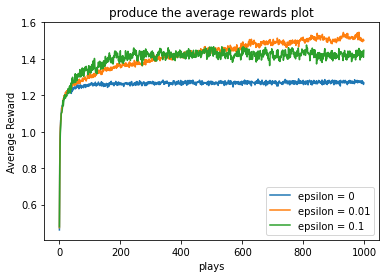

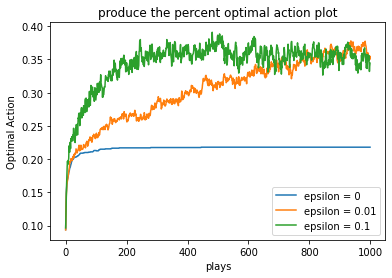

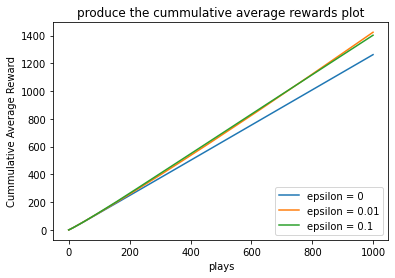

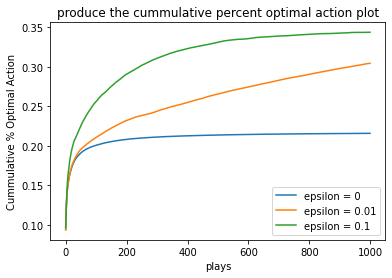

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
for l in range(len(epsArray)):
  plt.plot(avgReward[l,:], label="epsilon = " + str(epsArray[l]))
  plt.title('produce the average rewards plot')
  plt.ylabel('Average Reward')
  plt.xlabel('plays')
  plt.legend(loc='lower right')
plt.show()

plt.figure()
for o in range(len(epsArray)):
  plt.plot(perOptAction[o,:], label="epsilon = " + str(epsArray[o]))
  plt.title('produce the percent optimal action plot')
  plt.ylabel('Optimal Action')
  plt.xlabel('plays')
  plt.legend(loc='lower right')
plt.show()

plt.figure()
for p in range(len(epsArray)):
  plt.plot(cumReward[p,:], label="epsilon = " + str(epsArray[p]))
  plt.title('produce the cummulative average rewards plot')
  plt.ylabel('Cummulative Average Reward')
  plt.xlabel('plays')
  plt.legend(loc='lower right')
plt.show()

plt.figure()
for t in range(len(epsArray)):
  plt.plot(cumProb[t,:], label="epsilon = " + str(epsArray[t]))
  plt.title('produce the cummulative percent optimal action plot')
  plt.ylabel('Cummulative % Optimal Action')
  plt.xlabel('plays')
  plt.legend(loc='lower right')
plt.show()